In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 0: Stochastic Gradient Descent for Hooke’s Law.

NOTE: I want all the vectors to be column vectors so I will be transposing all the used numpy 1d arrays when needed. Also, all the vectors in the mathematical expressions I will be using are column vectors.

a. <br>
Introducing m, the vector of the mass values of the hanged weights (the inputs) in Kg and l, the new maximum length of the spring when the weights are hanging (the outputs) in m. We scatter these values in the (Mass, Length) plane to identify the trend in their behavior.

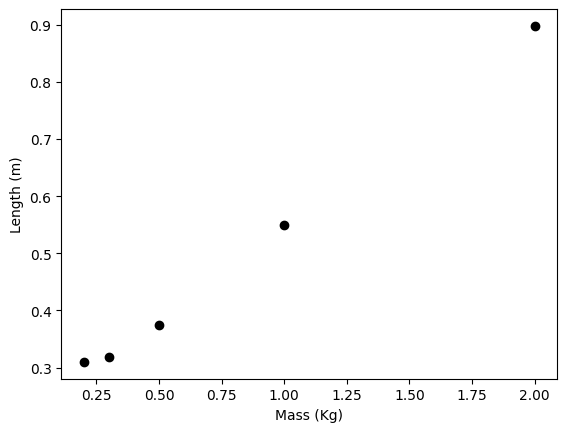

In [4]:
m = [1, 0.5, 2, 0.3, 0.2]
l = [55, 37.5, 89.8, 31.8, 31]
l = np.array(l)*1e-2  #to convert the value from cm to m

plt.scatter(m, l, color = "k")
plt.ylabel("Length (m)")
plt.xlabel("Mass (Kg)")
plt.show()

b. <br>
I will first build the design matrix (feature vector) which takes the input values and raises them to the powers (0, ... , n) where n is the order of the fitting polynomial we choose.<br>
We can then construct and solve the normal equation $$X^TX w^* = X^Ty$$ To avoid using the inverse function (which is computationally costy), I used numpy linalg.solve function which instead of solving the equation by inverting  the $X^TX$ matrix, it calls a function that factorizes the matrix using LU decomposition, then solves for $w^*$ using forward and backward substitution.<br>
This found $w^*$ is the coefficients vector for the polynomial of order n that fits our data. Noting that, from looking at our scattered data graph, we can tell that a polynomial of order 1 should fit them.

In [5]:
#Building the design matrix X:
order = 1
n = len(m)
X = np.zeros((n, order+1))
for i in range(order+1):
    X[:, i] = np.array(m)**i


#Computing the coefficients vector:
X_new = np.transpose(X) @ X
y = np.transpose(X) @ np.array(l).T
coef_vect = np.linalg.solve(X_new, y) 
print("Coefficients vector using the normal equation:", coef_vect)

Coefficients vector using the normal equation: [0.22227339 0.33490826]


c. <br>
Having found the coefficients vector in part b, we construct the 1st order polynimial which is our model $f_{w^*}(x)$ and check how good it fits our data by evaluating the loss function $$\mathcal{L} = \frac{1}{N} \sum\limits_{i}^N (y_i - f_{w^*}(x))^2$$ Where N is the number of the data points we have.

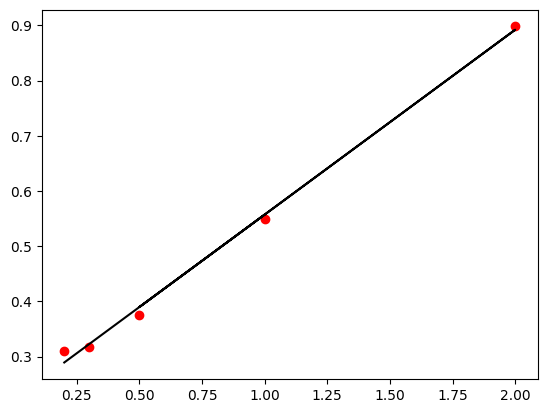

Total loss by solving the normal equation: 0.00015125633027522923


In [6]:
p0 = 0
for i in range(order+1):
    p0 += coef_vect[i]* np.array(m)**i
plt.scatter(m, l, color = "r")
plt.plot(m, p0, color = 'k')
plt.show()


#Evaluating the total loss of the model:
loss = (1/n) * np.sum((np.array(l).T - p0)**2)
print("Total loss by solving the normal equation:", loss)

Another way to find the coefficients vector that minimizes the loss function is by using the Gradient Descent method. The loss function is proportional to<br> 
$$\mathcal{L} \propto ||y - Xw||^2_2$$
Finding the gradient of $\mathcal{L}$ with respect to w $$\nabla_w \mathcal{L} = -2X^T(y - Xw) $$
To minimize the Loss function, we keep going against the direction of its gradient and keep updating the value of w at each step, such that $$w \leftarrow w + \eta 2X^T(y - Xw) $$ Where $\eta$ is defined as the learning rate or the step size.

The number of coefficients needed for an nth order polynomial is = n + 1, so I initiated the coefficients vector to n + 1 zero elements then applied the GD method for 500 iterations updating the $w$ values with each iteration. We know that $w$ should (often) eventually converge to $w^*$ for a concaved Loss function given enough number of iterations, which gives us the optimal coefficients vector for our nth order polynomial. We can then construct and plot our model.<br>

Coefficients vector using Gradient Descent: [0.22227371 0.33490796]


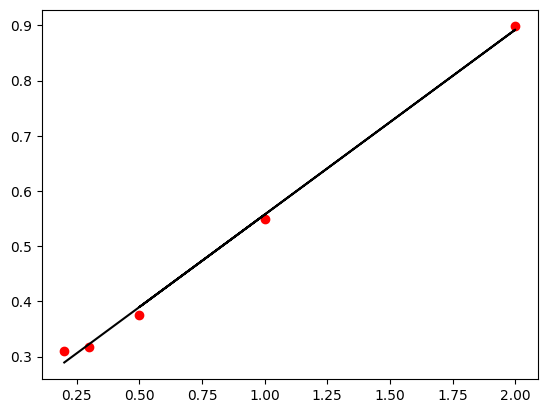

In [7]:
order = 1
eta = 0.01
w = np.zeros(order+1)
for i in range(500):
    grad = -2*X.T@(np.array(l).T - X@w.T)
    w = w - eta*grad  
print("Coefficients vector using Gradient Descent:", w)


p1 = 0
for i in range(order+1):
    p1 += w[i]* np.array(m)**i
plt.scatter(m, l, color = "r")
plt.plot(m, p1, color = 'k', label = "GD")
plt.show()

d. <br>
Computing the full gradient at each iteration is of slow progress and computationally expensive, instead, we can use a faster (often) algorithm that computes the gradient at 1 point of the data set at a time and makes more progress during an iteration (rendering it faster than GD). Such an algorithm is called the Stocahstic Gradient Descent method SGD. <br> We start by defining the indices array and we shuffle it randomly upon each iteration. So, in each epoch, we are going over the whole data set 1 point at a time but the order randomly changes. <br>
Since SGD progresses in 1 iteration faster than 1 iteration using GD, using the same number of iterations must (in normal situations where things are smooth) give us more progress, but not necessarily faster convergence. I will hence use the same number of iterations I used in the GD method. <br>
We apply SGD such that  $$w[i+1] \leftarrow w[i] + \eta 2X[i]^T(y[i] - X[i].w) $$ We then construct and plot our model.

Coefficients vector using Stochastic Gradient Descent: [0.22207051 0.33492274]


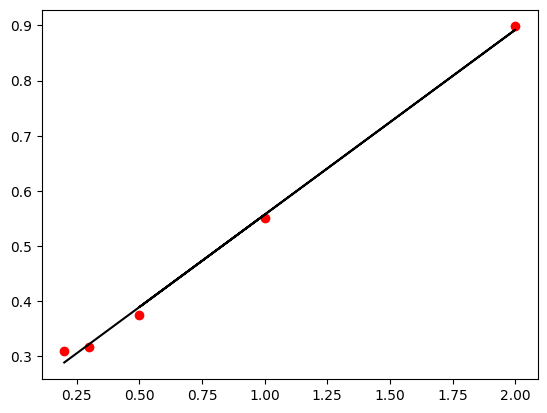

In [8]:
eta = 0.01
w_ = np.zeros(order+1)

w0 = []
w1 = []
loss_array = []
indices = np.arange(n)

for i in range(500):
    for j in indices:
     w_ = w_ - eta* (-2*X[j,:].T*(l[j] - X[j,:]@w_.T))
    w0.append(w_[0])
    w1.append(w_[1])
    p1 = 0
    for i in range(order+1):
       p1 += w_[i]* np.array(m)**i
    loss_array.append((1/n) * np.sum((np.array(l).T - p1)**2))
    np.random.shuffle(indices)
       
print("Coefficients vector using Stochastic Gradient Descent:",w_)

plt.scatter(m, l, color = "r")
plt.plot(m, p1, color = 'k')
plt.show()

e. <br>
After each iteration in d, I computed the loss function and appended it to an array. Plotting this array as function of epochs (iterations) will help us visualize the evolution of the loss as we keep iterating and updating our coefficients vector. <br>
We can see how the loss converges fast to 0.

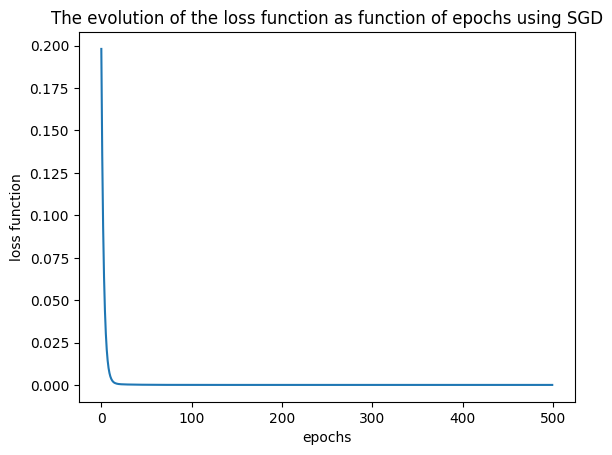

In [9]:
plt.plot(np.arange(500), loss_array)
plt.title("The evolution of the loss function as function of epochs using SGD")
plt.ylabel("loss function")
plt.xlabel("epochs")
plt.show()

f. <br>
After each iteration in d, I stored the updated components of $w$ ($w_0, w_1$) and scattered these components against each other. They seem to cluster up near the optimal values, then converge. Which means that the value start approaching the optimum very fast (the faster progress we talked about) but slows down and cluster around the optimum.

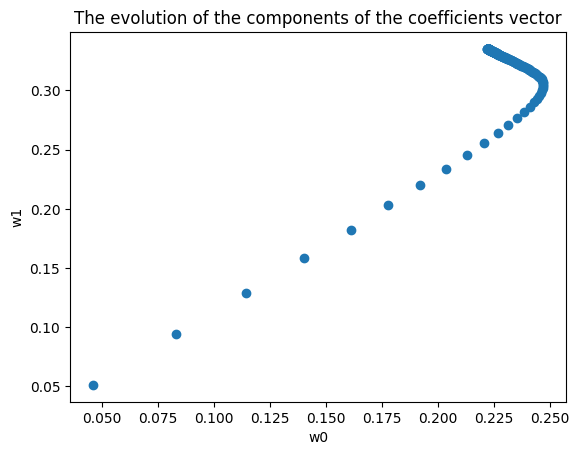

In [10]:
plt.scatter(w0,w1)
plt.title("The evolution of the components of the coefficients vector")
plt.ylabel("w1")
plt.xlabel("w0")
plt.show()